<a href="https://colab.research.google.com/github/nadyaputriast/Optimize_Scheduling_Employee/blob/main/Scheduling%20Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Scheduling/Call Center Data.csv')
df.head()

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,1,217,204,94.01%,13,0:00:17,0:02:14,0:02:45,76.28%
1,2,200,182,91.00%,18,0:00:20,0:02:22,0:06:55,72.73%
2,3,216,198,91.67%,18,0:00:18,0:02:38,0:03:50,74.30%
3,4,155,145,93.55%,10,0:00:15,0:02:29,0:03:12,79.61%
4,5,37,37,100.00%,0,0:00:03,0:02:06,0:00:35,97.30%


In [ ]:
import numpy as np

In [ ]:
start_date = pd.to_datetime("2020-01-01")
df["Date"] = start_date + pd.to_timedelta(df["Index"] - 1, unit="D")

df[["Index", "Date"]].head()

,Index,Date
0,1,2020-01-01
1,2,2020-01-02
2,3,2020-01-03
3,4,2020-01-04
4,5,2020-01-05


In [ ]:
df

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds),Date
0,1,217,204,94.01%,13,0:00:17,0:02:14,0:02:45,76.28%,2020-01-01
1,2,200,182,91.00%,18,0:00:20,0:02:22,0:06:55,72.73%,2020-01-02
2,3,216,198,91.67%,18,0:00:18,0:02:38,0:03:50,74.30%,2020-01-03
3,4,155,145,93.55%,10,0:00:15,0:02:29,0:03:12,79.61%,2020-01-04
4,5,37,37,100.00%,0,0:00:03,0:02:06,0:00:35,97.30%,2020-01-05
...,...,...,...,...,...,...,...,...,...,...
1246,1247,191,184,96.34%,7,0:00:07,0:02:50,0:01:56,92.55%,2023-05-31
1247,1248,212,209,98.58%,3,0:00:10,0:02:51,0:01:45,89.10%,2023-06-01
1248,1249,210,203,96.67%,7,0:00:12,0:03:22,0:03:52,85.24%,2023-06-02
1249,1250,167,159,95.21%,8,0:00:16,0:03:16,0:02:42,83.03%,2023-06-03


In [ ]:
df.dtypes

,0
Index,int64
Incoming Calls,int64
Answered Calls,int64
Answer Rate,object
Abandoned Calls,int64
Answer Speed (AVG),object
Talk Duration (AVG),object
Waiting Time (AVG),object
Service Level (20 Seconds),object
Date,datetime64[ns]


In [ ]:
if df["Service Level (20 Seconds)"].dtype == "object":
    df["Service Level (20 Seconds)"] = df["Service Level (20 Seconds)"].str.rstrip("%").astype(float) / 100

df.dtypes["Service Level (20 Seconds)"]

dtype('float64')

In [ ]:
if df["Answer Rate"].dtype == "object":
    df["Answer Rate"] = df["Answer Rate"].str.rstrip("%").astype(float) / 100

df.dtypes["Answer Rate"]

dtype('float64')

In [ ]:
df.dtypes

,0
Index,int64
Incoming Calls,int64
Answered Calls,int64
Answer Rate,float64
Abandoned Calls,int64
Answer Speed (AVG),object
Talk Duration (AVG),object
Waiting Time (AVG),object
Service Level (20 Seconds),float64
Date,datetime64[ns]


In [ ]:
def time_to_seconds(time_str):
    try:
        h, m, s = map(int, time_str.split(":"))
        return h * 3600 + m * 60 + s
    except:
        return None

time_columns = ["Answer Speed (AVG)", "Talk Duration (AVG)", "Waiting Time (AVG)"]

for col in time_columns:
    if df[col].dtype == "object":
        df[col] = df[col].astype(str).apply(time_to_seconds)

In [ ]:
df.dtypes

,0
Index,int64
Incoming Calls,int64
Answered Calls,int64
Answer Rate,float64
Abandoned Calls,int64
Answer Speed (AVG),int64
Talk Duration (AVG),int64
Waiting Time (AVG),int64
Service Level (20 Seconds),float64
Date,datetime64[ns]


In [ ]:
df["Service Level (20 Seconds)"] = df["Service Level (20 Seconds)"].astype(str).str.rstrip("%")
df["Service Level (20 Seconds)"] = pd.to_numeric(df["Service Level (20 Seconds)"], errors="coerce") / 100

df["Service Level (20 Seconds)"] = df["Service Level (20 Seconds)"].astype(float)
daily_summary = df.groupby("Date").agg({
    "Incoming Calls": "sum",
    "Answered Calls": "sum",
    "Abandoned Calls": "sum",
    "Answer Rate": "mean",
    "Waiting Time (AVG)": "mean",
    "Answer Speed (AVG)": "mean",
    "Talk Duration (AVG)": "mean",
    "Service Level (20 Seconds)": "mean"
}).reset_index()

daily_summary.head()

,Date,Incoming Calls,Answered Calls,Abandoned Calls,Answer Rate,Waiting Time (AVG),Answer Speed (AVG),Talk Duration (AVG),Service Level (20 Seconds)
0,2020-01-01,217,204,13,0.9401,165.0,17.0,134.0,0.007628
1,2020-01-02,200,182,18,0.9100,415.0,20.0,142.0,0.007273
2,2020-01-03,216,198,18,0.9167,230.0,18.0,158.0,0.007430
3,2020-01-04,155,145,10,0.9355,192.0,15.0,149.0,0.007961
4,2020-01-05,37,37,0,1.0000,35.0,3.0,126.0,0.009730


### Visualize the Daily Call Volume

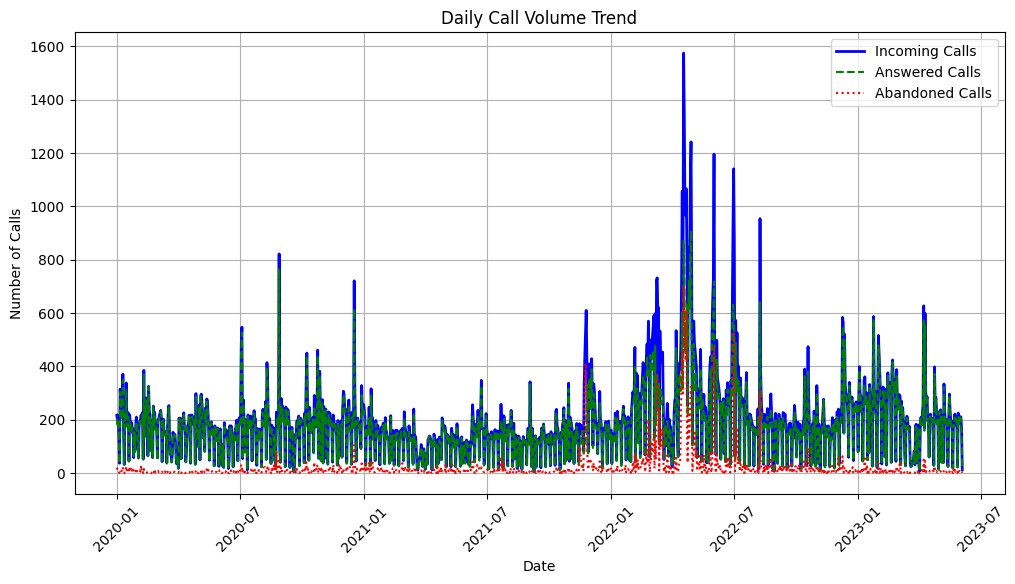

In [ ]:
import matplotlib.pyplot as plt

# Plot tren jumlah panggilan per hari
plt.figure(figsize=(12, 6))
plt.plot(daily_summary["Date"], daily_summary["Incoming Calls"], label="Incoming Calls", color="blue", linewidth=2)
plt.plot(daily_summary["Date"], daily_summary["Answered Calls"], label="Answered Calls", color="green", linestyle="dashed")
plt.plot(daily_summary["Date"], daily_summary["Abandoned Calls"], label="Abandoned Calls", color="red", linestyle="dotted")

# Format tampilan
plt.xlabel("Date")
plt.ylabel("Number of Calls")
plt.title("Daily Call Volume Trend")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Tampilkan plot
plt.show()

### Analysis Categorized Day

In [ ]:
df = df.copy()

day_counts = df["Date"].dt.day_name().value_counts()

weekly_summary = df.groupby(df["Date"].dt.day_name()).agg({
    "Incoming Calls": "sum",
    "Answered Calls": "sum",
    "Abandoned Calls": "sum",
    "Waiting Time (AVG)": "mean",
    "Talk Duration (AVG)": "mean",
}).reset_index()

weekly_summary["Incoming Calls"] /= weekly_summary["Date"].map(day_counts)
weekly_summary["Answered Calls"] /= weekly_summary["Date"].map(day_counts)
weekly_summary["Abandoned Calls"] /= weekly_summary["Date"].map(day_counts)

weekly_summary

,Date,Incoming Calls,Answered Calls,Abandoned Calls,Waiting Time (AVG),Talk Duration (AVG)
0,Friday,228.687151,200.368715,28.318436,267.687151,158.681564
1,Monday,231.713483,208.471910,23.241573,235.629213,156.224719
2,Saturday,206.530726,184.603352,21.927374,235.212291,157.927374
3,Sunday,45.167598,41.083799,4.083799,139.849162,157.167598
4,Thursday,227.446927,199.262570,28.184358,264.240223,159.357542
5,Tuesday,225.106742,204.050562,21.056180,229.994382,156.438202
6,Wednesday,225.458101,200.407821,25.050279,253.597765,157.050279


**Assumption**

Misalkan terdapat beberapa kombinasi shift yg bisa dipilih oleh pekerja sebagai day-off mereka. misalnya sebagai berikut:

1. Senin - Selasa
2. Selasa - Rabu
3. Rabu - Kamis
4. Kamis - Jumat
5. Jumat - Sabtu
6. Sabtu - Minggu
7. Minggu - Senin

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 84.7 MB/s eta 0:00:00


In [ ]:
import pulp

In [ ]:
from pulp import LpMinimize, LpProblem, LpVariable, lpSum

# making a model to minimized abandoned call
model = LpProblem("Minimize_Abandoned_Calls", LpMinimize)

# decision variable
x = {i: LpVariable(f"x{i}", lowBound=0, cat='Integer') for i in range(1, 8)}

# objective function
model += 24*x[1] + 22*x[2] + 26*x[3] + 29*x[4] + 29*x[5] + 22*x[6] + 5*x[7]

# constraint
model += x[2] + x[3] + x[4] + x[5] + x[6] >= 232, "Shift_1_Constraint"
model += x[3] + x[4] + x[5] + x[6] + x[7] >= 226, "Shift_2_Constraint"
model += x[1] + x[4] + x[5] + x[6] + x[7] >= 226, "Shift_3_Constraint"
model += x[1] + x[2] + x[5] + x[6] + x[7] >= 228, "Shift_4_Constraint"
model += x[1] + x[2] + x[3] + x[6] + x[7] >= 229, "Shift_5_Constraint"
model += x[1] + x[2] + x[3] + x[4] + x[7] >= 207, "Shift_6_Constraint"
model += x[1] + x[2] + x[3] + x[4] + x[5] >= 46, "Shift_7_Constraint"

model.solve()

print("Optimized CSR Allocation per Shift:")
total_csrs = 0
for i in range(1, 8):
    csrs = int(x[i].value())
    total_csrs += csrs
    print(f"Shift {i}: {csrs} CSRs")

print(f"\nTotal CSRs needed: {total_csrs}")

Optimized CSR Allocation per Shift:
Shift 1: 0 CSRs
Shift 2: 106 CSRs
Shift 3: 0 CSRs
Shift 4: 0 CSRs
Shift 5: 0 CSRs
Shift 6: 126 CSRs
Shift 7: 101 CSRs

Total CSRs needed: 333


In [ ]:
from pulp import LpMinimize, LpProblem, LpVariable, lpSum

day_off_options = [
    ("Monday", "Tuesday"),
    ("Tuesday", "Wednesday"),
    ("Wednesday", "Thursday"),
    ("Thursday", "Friday"),
    ("Friday", "Saturday"),
    ("Saturday", "Sunday"),
    ("Sunday", "Monday")
]

days = weekly_summary["Date"].tolist()
daily_calls = {day: weekly_summary.loc[weekly_summary["Date"] == day, "Incoming Calls"].values[0] for day in days}

# decision variable
x = {i: LpVariable(f"CSR_{i}", lowBound=0, cat='Integer') for i in range(1, 8)}

# define optimation model
model = LpProblem("CSR_Staffing_Optimization", LpMinimize)

# objective function
model += lpSum(x[i] for i in range(1, 8))

# constraint
for i, day in enumerate(days):
    required_CSR = daily_calls[day]
    working_CSR = lpSum(x[j] for j, (off1, off2) in enumerate(day_off_options, 1) if day not in (off1, off2))
    model += working_CSR >= required_CSR, f"Staffing_{day}"

model.solve()

# print the output
print("Optimized CSR Allocation per Day-Off Combination:")
for i, (off1, off2) in enumerate(day_off_options, 1):
    print(f"Day-Off {off1} & {off2}: {int(x[i].varValue)} CSR")

# Hitung jumlah CSR yang bekerja setiap hari dengan perhitungan yang benar
day_csr_count = {day: 0 for day in days}

for i, (off1, off2) in enumerate(day_off_options, 1):
    assigned_csr = int(x[i].varValue)
    for day in days:
        if day not in (off1, off2):
            day_csr_count[day] += assigned_csr

# Debugging Output untuk Memeriksa Hasil Perhitungan
print("\nTotal CSR Working Each Day:")
for day, csr_count in day_csr_count.items():
    expected_csr = daily_calls[day]
    print(f"{day}: {csr_count} CSR (Expected: {expected_csr})")

Optimized CSR Allocation per Day-Off Combination:
Day-Off Monday & Tuesday: 0 CSR
Day-Off Tuesday & Wednesday: 72 CSR
Day-Off Wednesday & Thursday: 0 CSR
Day-Off Thursday & Friday: 69 CSR
Day-Off Friday & Saturday: 0 CSR
Day-Off Saturday & Sunday: 91 CSR
Day-Off Sunday & Monday: 66 CSR

Total CSR Working Each Day:
Friday: 229 CSR (Expected: 228.68715083798884)
Monday: 232 CSR (Expected: 231.7134831460674)
Saturday: 207 CSR (Expected: 206.53072625698323)
Sunday: 141 CSR (Expected: 45.167597765363126)
Thursday: 229 CSR (Expected: 227.44692737430168)
Tuesday: 226 CSR (Expected: 225.1067415730337)
Wednesday: 226 CSR (Expected: 225.45810055865923)


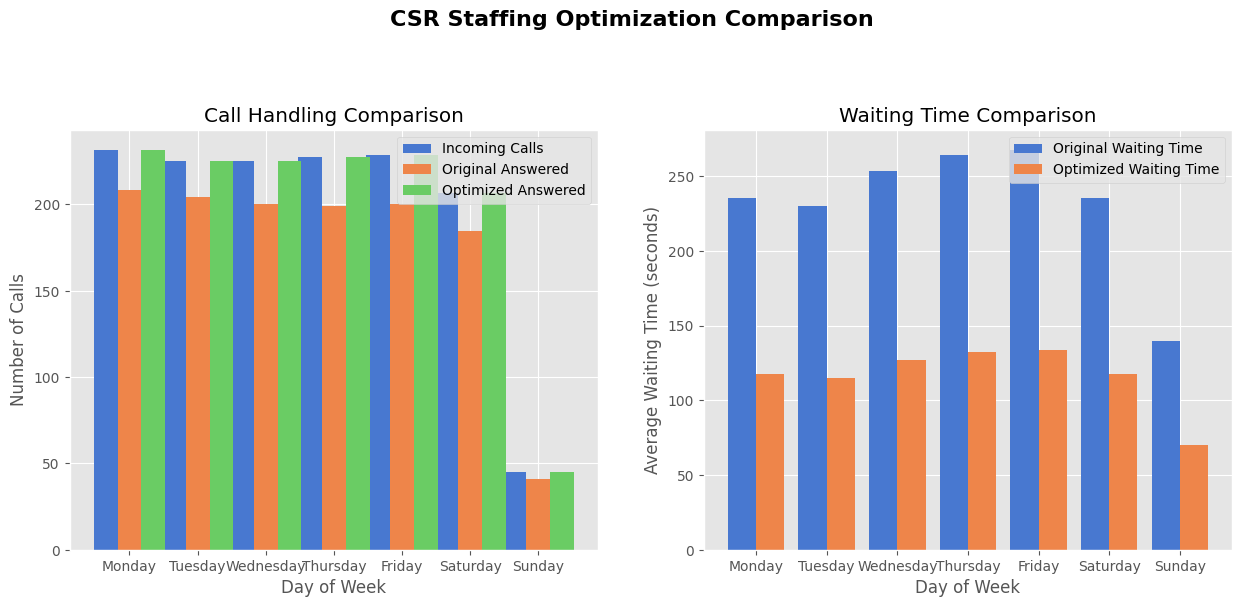


Summary of Improvements:
      Day  Original_Answered  Original_Abandoned  Optimized_Answered  Optimized_Abandoned
   Monday             208.47               23.24              231.71                    0
  Tuesday             204.05               21.06              225.11                    0
Wednesday             200.41               25.05              225.46                    0
 Thursday             199.26               28.18              227.45                    0
   Friday             200.37               28.32              228.69                    0
 Saturday             184.60               21.93              206.53                    0
   Sunday              41.08                4.08               45.17                    0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style
plt.style.use('ggplot')
sns.set_palette("muted")

# copy the data from weekly summary to this dictionary
original_data = {
    'Day': ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
    'Incoming_Calls': [228.69, 231.71, 206.53, 45.17, 227.45, 225.11, 225.46],
    'Answered_Calls': [200.37, 208.47, 184.60, 41.08, 199.26, 204.05, 200.41],
    'Abandoned_Calls': [28.32, 23.24, 21.93, 4.08, 28.18, 21.06, 25.05],
    'Waiting_Time_AVG': [267.69, 235.63, 235.21, 139.85, 264.24, 229.99, 253.60],
    'Talk_Duration_AVG': [158.68, 156.22, 157.93, 157.17, 159.36, 156.44, 157.05]
}

# create DataFrame
df_original = pd.DataFrame(original_data)

# create day-to-index mapping
day_to_index = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# sort the dataframe by day of week
df_original['DayIndex'] = df_original['Day'].map(day_to_index)
df_original = df_original.sort_values('DayIndex').reset_index(drop=True)

# ceiling the number of CSR that needed for each day
df_original['Required_CSRs'] = np.ceil(df_original['Incoming_Calls'])

df_optimized = df_original.copy() # copy the DataFrame
df_optimized['Answered_Calls'] = df_optimized['Incoming_Calls']  # answering all calls
df_optimized['Abandoned_Calls'] = 0  # mo abandoned calls
df_optimized['Waiting_Time_AVG'] = df_optimized['Waiting_Time_AVG'] * 0.5  # reduced waiting time, half of the original one

# create figure with subplots
fig = plt.figure(figsize=(15, 12))
fig.suptitle('CSR Staffing Optimization Comparison', fontsize=16, fontweight='bold')

# Plot 1: Original vs Optimized Call Handling
ax1 = fig.add_subplot(2, 2, 1)
bar_width = 0.35
index = np.arange(len(df_original))

bar1 = ax1.bar(index, df_original['Incoming_Calls'], bar_width, label='Incoming Calls')
bar2 = ax1.bar(index + bar_width, df_original['Answered_Calls'], bar_width, label='Original Answered')
bar3 = ax1.bar(index + 2*bar_width, df_optimized['Answered_Calls'], bar_width, label='Optimized Answered')

ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Number of Calls')
ax1.set_title('Call Handling Comparison')
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(df_original['Day'])
ax1.legend()

# Plot 2: Waiting Time Comparison
ax2 = fig.add_subplot(2, 2, 2)
bar_width = 0.4
index = np.arange(len(df_original))

bar1 = ax2.bar(index, df_original['Waiting_Time_AVG'], bar_width, label='Original Waiting Time')
bar2 = ax2.bar(index + bar_width, df_optimized['Waiting_Time_AVG'], bar_width, label='Optimized Waiting Time')

ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Average Waiting Time (seconds)')
ax2.set_title('Waiting Time Comparison')
ax2.set_xticks(index + bar_width/2)
ax2.set_xticklabels(df_original['Day'])
ax2.legend()

# Save the figure
plt.savefig('CSR_Optimization_Comparison.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

# Create a summary table of improvements
summary_df = pd.DataFrame({
    'Day': df_original['Day'],
    'Original_Answered': df_original['Answered_Calls'],
    'Original_Abandoned': df_original['Abandoned_Calls'],
    'Optimized_Answered': df_optimized['Answered_Calls'],
    'Optimized_Abandoned': df_optimized['Abandoned_Calls'],
})

print("\nSummary of Improvements:")
print(summary_df.to_string(index=False))

# Calculate overall improvements
total_original_incoming = df_original['Incoming_Calls'].sum()
total_original_answered = df_original['Answered_Calls'].sum()
total_original_abandoned = df_original['Abandoned_Calls'].sum()
total_optimized_answered = df_optimized['Answered_Calls'].sum()
total_optimized_abandoned = df_optimized['Abandoned_Calls'].sum()